<a href="https://colab.research.google.com/github/qasimramzankbk/Qasi/blob/main/assigment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-9-168a7577e4e3>:38: RuntimeWarning: overflow encountered in exp
  return prefactor * (1 / (np.exp(exponent) - 1))


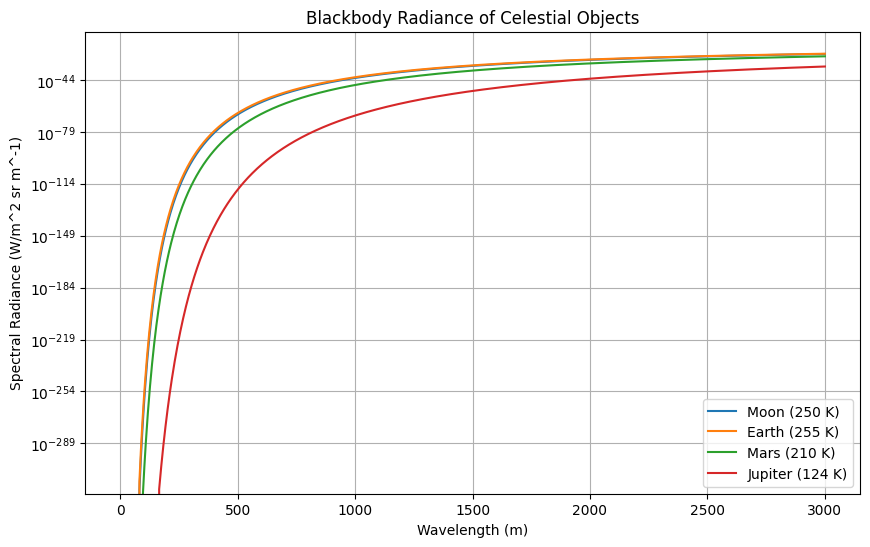

After 10,000 simulations, and provided win probabilities, the winning car is: Car1
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   ObjectId                       Country ISO2 ISO3  \
0         1  Afghanistan, Islamic Rep. of   AF  AFG   
1         2                       Albania   AL  ALB   
2         3                       Algeria   DZ  DZA   
3         4                American Samoa   AS  ASM   
4         5      Andorra, Principality of   AD  AND   

                                           Indicator            Unit  \
0  Temperature change with respect to a baseline ...  Degree Celsius   
1  Temperature change with respect to a baseline ...  Degree Celsius   
2  Temperature change with respect to a baseline ...  Degree Celsius   
3  Temperature change with respect to a baseline ...  Degree Celsius   
4  Temperature change with respect to a baseline ...  Degree Celsius   

                        

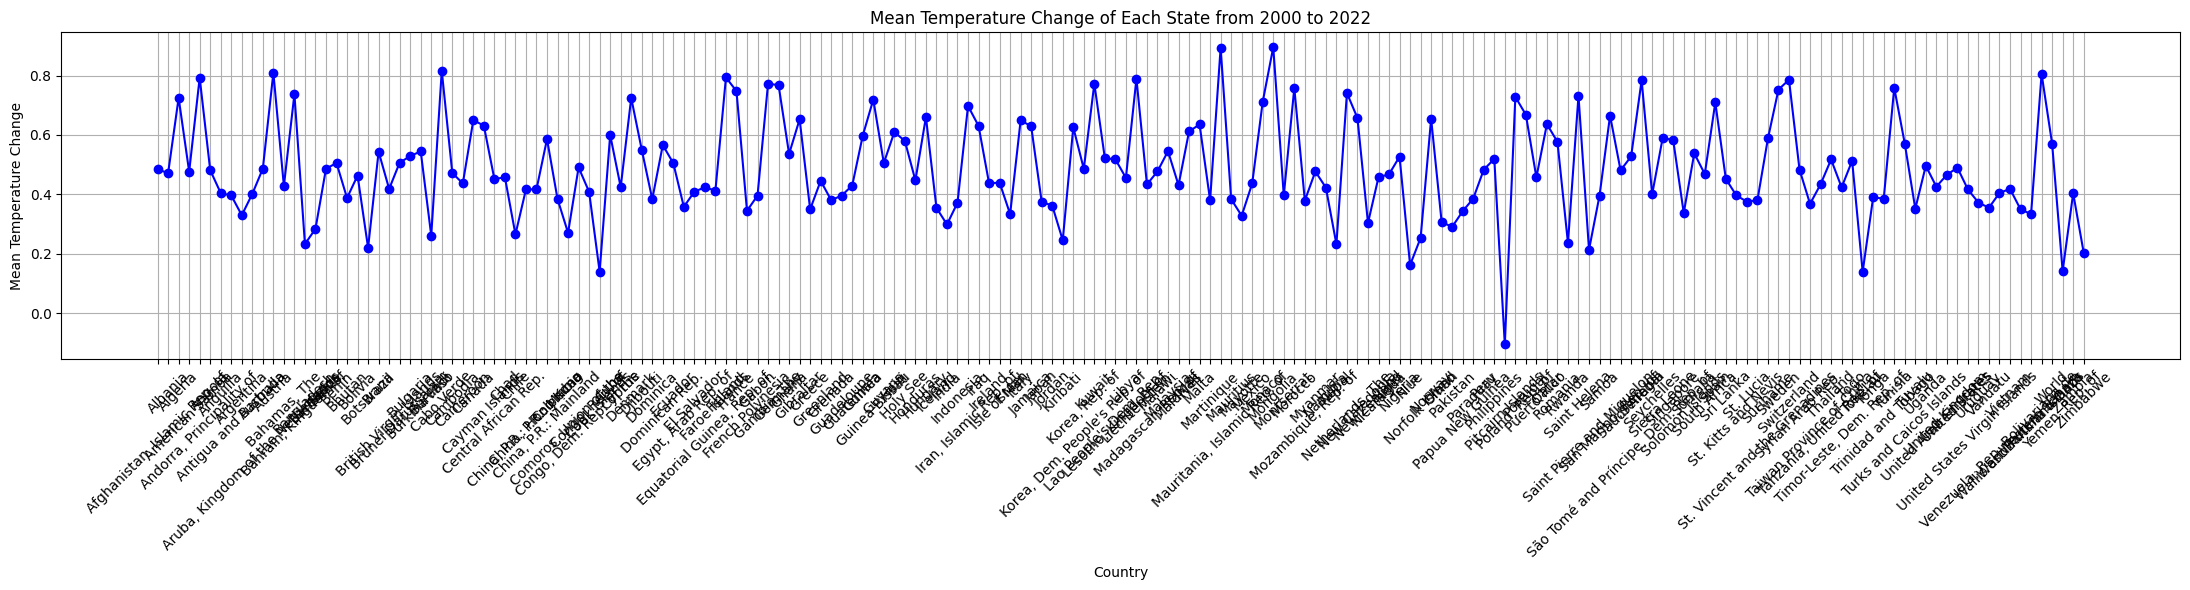

The state with the maximum temperature change for each year between 2000 and 2022 is: Finland 


In [ ]:
# -*- coding: utf-8 -*-
"""
@author: 335486961
"""
# Enter student number here:    335486961

# ------------------------------------------------------------------

import numpy as np
import matplotlib.pyplot as plt

#TASK 1


# (a) Physical constants (SI units)
h = 6.62607015e-34  # J s (Planck constant)
c = 2.99792458e8    # m/s (Speed of light)
k_B = 1.380649e-23  # J/K (Boltzmann constant)


def blackbody_radiance(wavelength, temperature):
    """
    Calculates the spectral radiance of a blackbody at a given temperature and wavelength.

    Args:
        wavelength: Wavelength of radiation in meters (float).
        temperature: Temperature of the blackbody in Kelvin (float).

    Returns:
        Spectral radiance at the given wavelength and temperature (float).
    """

    if np.any(wavelength <= 0):
        raise ValueError("Wavelength must be positive.")

    prefactor = 2 * h * c*2 / wavelength*5
    exponent = h * c / (wavelength * k_B * temperature)
    return prefactor * (1 / (np.exp(exponent) - 1))


# Define wavelength range (meters)
wavelength_range = np.linspace(1e-9, 3000e-9, 1000)

#Part (b)

# Temperatures of celestial objects (Kelvin)
temperatures = {
    "Moon": 250,
    "Earth": 255,
    "Mars": 210,
    "Jupiter": 124
}

# Create plot
plt.figure(figsize=(10, 6))
plt.xlabel("Wavelength (m)")
plt.ylabel("Spectral Radiance (W/m^2 sr m^-1)")
plt.title("Blackbody Radiance of Celestial Objects")

# Plot for each celestial object
for name, temperature in temperatures.items():
    radiance = blackbody_radiance(wavelength_range, temperature)
    plt.plot(wavelength_range * 1e9, radiance, label=f"{name} ({temperature} K)")  # Convert nm for readability

plt.legend()
plt.grid(True)
plt.yscale("log")  # Use logarithmic scale for better visualization of wide range of intensities

plt.show()
  #  This program offers results for any range of wavelength values and the temperature.
  # Note:  This program offers warning indicating that there might be overflow issues due to large values in the exponential term. This could happen if the wavelength values are too small or if the temperature is too low. We can adjust the range of wavelength values and the temperature to avoid this issue.
#------------------------------------------------------------------

#TASK 2
import random

def simulate_car_race(car_names, win_probabilities, num_simulations):
    """
    Simulates a car race based on win probabilities and number of simulations.

    Args:
        car_names: List of car names (strings).
        win_probabilities: List of win probabilities for each car (floats between 0 and 1).
        num_simulations: Number of simulations to run (integer).

    Returns:
        The name of the car with the most wins (string).
    """

     # Initialize wins dictionary
    wins = {car: 0 for car in car_names}

    # Run simulations
    for _ in range(num_simulations):
        # Choose a random car based on win probabilities
        winner_index = random.choices(range(len(car_names)), cum_weights=win_probabilities)[0]
        wins[car_names[winner_index]] += 1

    # Find car with most wins
    winning_car = max(wins, key=wins.get)

    return winning_car

# Example usage
car_names = ["Car1", "Car2", "Car3", "Car4", "Car5"]
win_probabilities = [0.3, 0.2, 0.1, 0.15, 0.25]
num_simulations = 10000

winning_car = simulate_car_race(car_names, win_probabilities, num_simulations)
print(f"After {num_simulations:,} simulations, and provided win probabilities, the winning car is: {winning_car}")

# ------------------------------------------------------------------

#TASK 3

import pandas as pd
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
# Specify the file path in Google Drive
file_path = '/content/drive/MyDrive/climate.csv'

# Read the CSV file
df = pd.read_csv(file_path)

 # Display the first few rows of the DataFrame to understand the structure of the data
print(df.head())
df['Mean_Temp'] = df.loc[:, 'F1961':'F2022'].mean(axis=1)
print(df['Mean_Temp'].head())

# (a) Create a line plot of mean temperature against state name
plt.figure(figsize=(22, 6))
plt.plot(df['Country'], df['Mean_Temp'], marker='o', linestyle='-', color='b')
plt.xlabel('Country')
plt.ylabel('Mean Temperature Change')
plt.title('Mean Temperature Change of Each State from 2000 to 2022')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
# Display the plot
plt.show()

# (b) Filter the data for years 2000 to 2022
filtered_df = df.loc[:, 'F2000':'F2022']
# Calculate the maximum temperature for each state between 2000 and 2022
max_temp = filtered_df.max(axis=1)

# Find the state with the maximum temperature
max_state_index = max_temp.idxmax()
max_state_name = df.loc[max_state_index, 'Country']

# Print the state with the maximum temperature
print(f'The state with the maximum temperature change for each year between 2000 and 2022 is: {max_state_name} ')

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import plotly.graph_objects as go
import numpy as np
# Generate sample data
x = np.linspace(0, 10, 100)
y = np.sin(x)
# Create a basic line plot
fig = go.Figure(data=go.Scatter(x=x, y=y, mode='lines'))
# Add title and labels
fig.update_layout(title='Basic Line Plot', xaxis_title='X-axis', yaxis_title='Y-axis')
# Show the plot
fig.show()

In [ ]:
git clone https://github.com/davide-coccomini/Combining-EfficientNet-and-Vision-Transformers-for-Video-Deepfake-Detection.git

cd Combining-EfficientNet-and-Vision-Transformers-for-Video-Deepfake-Detection